In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
# 2.6.1 数据预处理：提取月消费

In [3]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,用户id,性别,是否老人,是否有伴侣,是否有亲属,在网时长,通话服务,多线程,网络服务,在线安全,...,设备安全,技术支持,流媒体电视,流媒体电影,合同期限,电子账单,支付方式,月消费,总消费,是否流失
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# 按是否流失进行分类：提取月消费
churn0 = data[data['是否流失']=='No']['月消费']
churn1 = data[data['是否流失']=='Yes']['月消费']
churn0.head()

0    29.85
1    56.95
3    42.30
6    89.10
7    29.75
Name: 月消费, dtype: float64

In [8]:
len(churn0),len(churn1)

(5174, 1869)

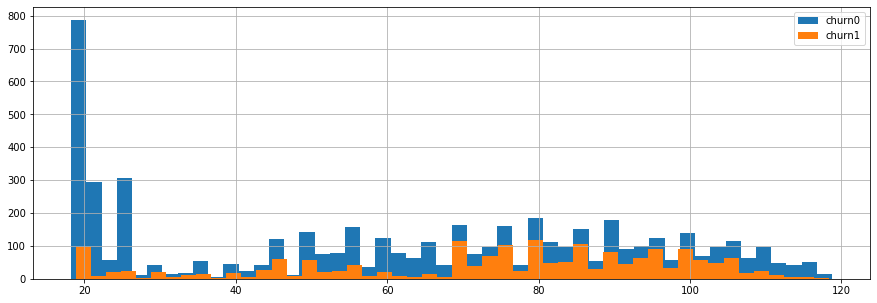

In [11]:
# 2.6.2 观察分布：频数分布、概率分布

plt.figure(figsize=(15,5))
churn0.hist(bins=50)
churn1.hist(bins=50)
plt.legend(labels=['churn0','churn1'])

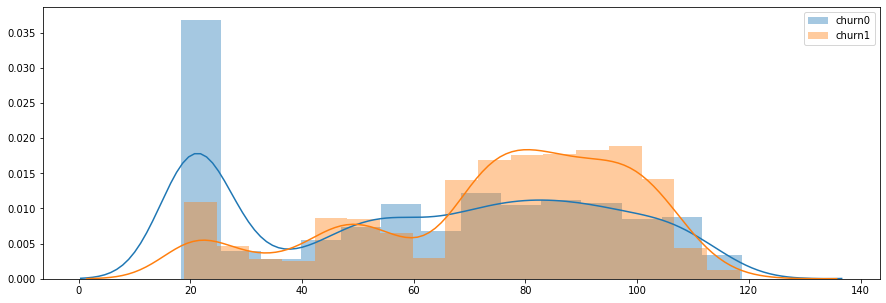

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(churn0.tolist())
sns.distplot(churn1.tolist())
plt.legend(labels=['churn0','churn1'])

In [5]:
# 2.6.3 双侧检验：是否存在显著性差异
# H0：非流失μ = 流失μ
# H1：非流失μ ≠ 流失μ

In [14]:
# 初始化
s0 = churn0.tolist()
s1 = churn1.tolist()

stats.ks_2samp(s0,s1) # p<‰1，存在显著性差异，拒绝H0，接受H1

Ks_2sampResult(statistic=0.24859894401422267, pvalue=3.954178391603937e-74)

In [15]:
# 描述性统计
stats.describe(s0)

DescribeResult(nobs=5174, minmax=(18.25, 118.75), mean=61.26512369540008, variance=966.7527670734264, skewness=-0.025012288702718842, kurtosis=-1.3551511690013145)

In [16]:
stats.describe(s1)

DescribeResult(nobs=1869, minmax=(18.85, 118.35), mean=74.44133226324237, variance=608.4141833954307, skewness=-0.7287883064780541, kurtosis=-0.36375819567133183)

In [6]:
# 2.6.4 右侧检验：非流失用户月消费是否大于流失用户
# H0：非流失μ <= 流失μ
# H1：非流失μ > 流失μ

In [18]:
stats.ks_2samp(s0,s1,'greater') # 获得p值测试：s0 > s1

Ks_2sampResult(statistic=0.24859894401422267, pvalue=1.6030572449681345e-74)

In [20]:
stats.ks_2samp(s0,s1,'less') # 获得p值测试：s0 < s1

Ks_2sampResult(statistic=0.029268869763477635, pvalue=0.09281582583124995)